In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df['Outcome'].value_counts()[0]

500

In [ ]:
df['Outcome'].value_counts()[1]

268

In [ ]:
df.isnull().values.any()

False

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_min=df.min(axis=0)

In [ ]:
df_min

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [ ]:
df_max=df.max(axis=0)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 8

#df = pd.read_csv('diabetes.csv', encoding='utf-8', engine='python')
# make a new df made of all the columns, except the target class
X = df.loc[:, df.columns != 'Outcome']
y = df.Outcome
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)



df_balance = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df_balance.columns = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 
              'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_balance.to_csv('df_smoted.csv', index=False, encoding='utf-8')

In [ ]:
df_balanced = pd.read_csv("df_smoted.csv")
df_balanced.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_balanced['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [ ]:
X = df_balanced.loc[:, df_balanced.columns != 'Outcome']

In [ ]:
y = df_balanced.Outcome

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
mean=X_train.mean(axis=0)

In [ ]:
mean

Pregnancies                   4.020000
Glucose                     126.142500
BloodPressure                68.610000
SkinThickness                20.686250
Insulin                      83.922500
BMI                          32.697597
DiabetesPedigreeFunction      0.483649
Age                          34.065000
dtype: float64

In [ ]:
X_train -= mean

In [ ]:
std=X_train.std(axis=0)

In [ ]:
X_train /= std

In [ ]:
X_test -= mean

In [ ]:
X_test /= std

The quantities used for normalizing the test data are computed using the training data. You should never use any quantity computed on the test data in your workflow.

In [ ]:
import tensorflow as tf

In [ ]:
X_train.shape

(800, 8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [ ]:
model = tf.keras.Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.BatchNormalization(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')        
])

In [ ]:
def get_early_stopping():
    return tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
early_stopping = get_early_stopping()
callbacks = [early_stopping]

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, 
                    validation_data= (X_test, y_test), callbacks=callbacks)

Epoch 1/100
50/50 [==============================] - 2s 9ms/step - loss: 0.6500 - accuracy: 0.6012 - val_loss: 0.6449 - val_accuracy: 0.6050
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5777 - accuracy: 0.7088 - val_loss: 0.5882 - val_accuracy: 0.6950
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5477 - accuracy: 0.7362 - val_loss: 0.5440 - val_accuracy: 0.7650
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5103 - accuracy: 0.7675 - val_loss: 0.5150 - val_accuracy: 0.7850
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4990 - accuracy: 0.7825 - val_loss: 0.4979 - val_accuracy: 0.7700
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.7775 - val_loss: 0.4879 - val_accuracy: 0.7800
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4848 - accuracy: 0.7800 - val_loss: 0.4817 - val_accuracy: 0.7800
Epoch 8/100
5

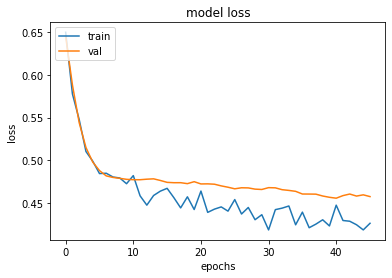

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

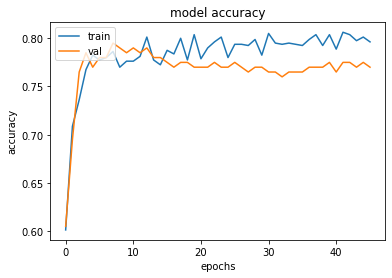

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

7/7 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

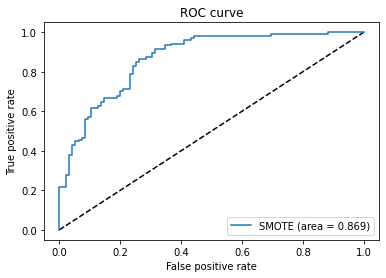

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='SMOTE (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
!pip install ctgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 370 kB/s 
     |████████████████████████████████| 636 kB 41.2 MB/s 
     |████████████████████████████████| 280 kB 46.5 MB/s 
     |████████████████████████████████| 1.6 MB 53.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 48.4 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
categorical_features = ['Outcome']

In [ ]:
from ctgan import CTGAN

In [ ]:
ctgan = CTGAN(verbose=True)
ctgan.fit(df, categorical_features, epochs = 400)

Epoch 1, Loss G:  0.8205,Loss D: -0.0162
Epoch 2, Loss G:  0.7755,Loss D: -0.0221
Epoch 3, Loss G:  0.7593,Loss D:  0.0035
Epoch 4, Loss G:  0.7549,Loss D: -0.0221
Epoch 5, Loss G:  0.7361,Loss D: -0.0501
Epoch 6, Loss G:  0.6906,Loss D: -0.0245
Epoch 7, Loss G:  0.6780,Loss D: -0.0275
Epoch 8, Loss G:  0.6736,Loss D: -0.0486
Epoch 9, Loss G:  0.6428,Loss D: -0.0595
Epoch 10, Loss G:  0.6006,Loss D: -0.0359
Epoch 11, Loss G:  0.5095,Loss D: -0.0409
Epoch 12, Loss G:  0.5277,Loss D: -0.0566
Epoch 13, Loss G:  0.5060,Loss D: -0.0330
Epoch 14, Loss G:  0.4105,Loss D:  0.0129
Epoch 15, Loss G:  0.4080,Loss D: -0.0381
Epoch 16, Loss G:  0.3280,Loss D: -0.0193
Epoch 17, Loss G:  0.2450,Loss D: -0.0987
Epoch 18, Loss G:  0.2203,Loss D:  0.0117
Epoch 19, Loss G:  0.1280,Loss D:  0.0112
Epoch 20, Loss G:  0.1008,Loss D: -0.0857
Epoch 21, Loss G:  0.0590,Loss D: -0.0711
Epoch 22, Loss G:  0.0689,Loss D: -0.0236
Epoch 23, Loss G: -0.0288,Loss D: -0.0921
Epoch 24, Loss G: -0.0769,Loss D: -0.0655
E

In [ ]:
samples = ctgan.sample(10000)

In [ ]:
samples['Outcome'].value_counts()

0    5645
1    4355
Name: Outcome, dtype: int64

In [ ]:
samples_new= samples.loc[
    (samples['Pregnancies'] >= df_min.Pregnancies) & (samples['Pregnancies'] <= df_max.Pregnancies) &
       (samples['Glucose'] >= df_min.Glucose) & (samples['Glucose'] <= df_max.Glucose)& 
       (samples['BloodPressure'] >= df_min.BloodPressure) & (samples['BloodPressure'] <= df_max.BloodPressure)& 
       (samples['SkinThickness'] >= df_min.SkinThickness) & (samples['SkinThickness'] <= df_max.SkinThickness)& 
       (samples['Insulin'] >= df_min.Insulin) & (samples['Insulin'] <= df_max.Insulin)& 
       (samples['BMI'] >= df_min.BMI) & (samples['BMI'] <= df_max.BMI)& 
       (samples['DiabetesPedigreeFunction'] >= df_min.DiabetesPedigreeFunction) & 
       (samples['DiabetesPedigreeFunction'] <= df_max.DiabetesPedigreeFunction)& 
       (samples['Age'] >= df_min.Age) & (samples['Age'] <= df_max.Age)
]

In [ ]:
samples_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,171,23,51,125,27.146461,0.342463,32,1
1,2,128,69,31,40,34.018253,0.759825,36,0
2,0,106,63,45,56,20.369842,0.650946,27,1
4,11,140,98,42,74,23.237198,0.763690,41,0
7,8,136,114,48,5,33.083115,0.855592,37,1
...,...,...,...,...,...,...,...,...,...
9988,1,96,80,35,9,30.426604,0.518262,22,0
9992,1,150,105,16,120,28.785804,0.777398,24,0
9993,2,107,99,19,64,44.118829,0.473548,30,0
9995,11,72,87,2,59,31.995427,0.320696,29,1


In [ ]:
samples_new['Outcome'].value_counts()

0    2968
1    2403
Name: Outcome, dtype: int64

In [ ]:
X = samples_new.loc[:, samples_new.columns != 'Outcome']

In [ ]:
y = samples_new.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
X_train.shape

(4296, 8)

In [ ]:
X_test.shape

(1075, 8)

In [ ]:
min=X_train.min(axis=0)

In [ ]:
min

Pregnancies                  0.000000
Glucose                     11.000000
BloodPressure                0.000000
SkinThickness                0.000000
Insulin                      0.000000
BMI                          8.159069
DiabetesPedigreeFunction     0.079522
Age                         21.000000
dtype: float64

In [ ]:
max=X_train.max(axis=0)

In [ ]:
max

Pregnancies                  17.000000
Glucose                     199.000000
BloodPressure               122.000000
SkinThickness                64.000000
Insulin                     844.000000
BMI                          61.931604
DiabetesPedigreeFunction      2.369880
Age                          81.000000
dtype: float64

In [ ]:
#X_train_normalized = (X_train - min) / (max - min)

In [ ]:
#X_test_normalized = (X_test - min) / (max - min)

Standardization works better

In [ ]:
mean=X_train.mean(axis=0)
X_train -= mean
std=X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

In [ ]:
model_for_ctgan = tf.keras.Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.BatchNormalization(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')        
])

In [ ]:
model_for_ctgan.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_for_ctgan.fit(X_train , y_train, epochs=100, batch_size=16, 
                              
                              validation_data= (X_test, y_test), callbacks=callbacks)

Epoch 1/100
269/269 [==============================] - 3s 6ms/step - loss: 0.6985 - accuracy: 0.5715 - val_loss: 0.6661 - val_accuracy: 0.6149
Epoch 2/100
269/269 [==============================] - 1s 5ms/step - loss: 0.6632 - accuracy: 0.6152 - val_loss: 0.6623 - val_accuracy: 0.6140
Epoch 3/100
269/269 [==============================] - 2s 6ms/step - loss: 0.6570 - accuracy: 0.6304 - val_loss: 0.6573 - val_accuracy: 0.6214
Epoch 4/100
269/269 [==============================] - 2s 6ms/step - loss: 0.6520 - accuracy: 0.6280 - val_loss: 0.6566 - val_accuracy: 0.6149
Epoch 5/100
269/269 [==============================] - 1s 5ms/step - loss: 0.6503 - accuracy: 0.6304 - val_loss: 0.6550 - val_accuracy: 0.6149
Epoch 6/100
269/269 [==============================] - 1s 5ms/step - loss: 0.6461 - accuracy: 0.6397 - val_loss: 0.6554 - val_accuracy: 0.6177
Epoch 7/100
269/269 [==============================] - 1s 5ms/step - loss: 0.6477 - accuracy: 0.6322 - val_loss: 0.6566 - val_accuracy: 0.6158

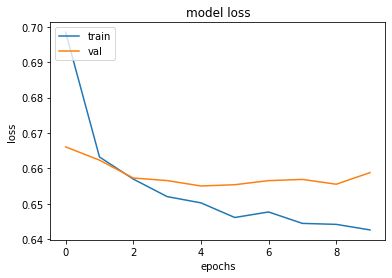

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

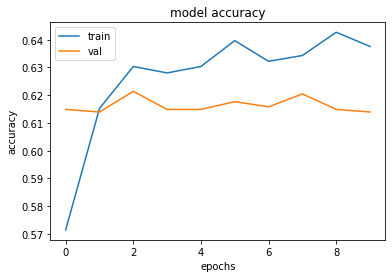

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred_keras = model_for_ctgan.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

34/34 [==============================] - 0s 2ms/step


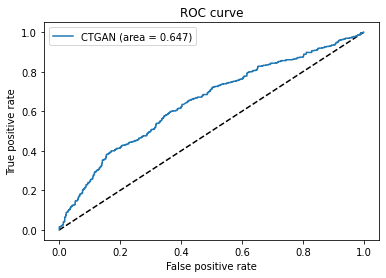

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='CTGAN (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
X = df.loc[:, df.columns != 'Outcome']

In [ ]:
y = df.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
y.value_counts()[0]

500

In [ ]:
y.value_counts()[1]

268

In [ ]:
pos = y.value_counts()[1]
neg = y.value_counts()[0]
total = pos+neg
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [ ]:
mean=X_train.mean(axis=0)
X_train -= mean
std=X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

In [ ]:
model_class_weights = tf.keras.Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.BatchNormalization(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')        
])

In [ ]:
model_class_weights.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_class_weights.fit(X_train , y_train, epochs=100, batch_size=16, 
                              
                              validation_data= (X_test, y_test),class_weight = class_weight,
                              callbacks=callbacks)

Epoch 1/100
39/39 [==============================] - 1s 11ms/step - loss: 0.6434 - accuracy: 0.6450 - val_loss: 0.6442 - val_accuracy: 0.6234
Epoch 2/100
39/39 [==============================] - 0s 6ms/step - loss: 0.5960 - accuracy: 0.6759 - val_loss: 0.6167 - val_accuracy: 0.6753
Epoch 3/100
39/39 [==============================] - 0s 7ms/step - loss: 0.5789 - accuracy: 0.7020 - val_loss: 0.5990 - val_accuracy: 0.6818
Epoch 4/100
39/39 [==============================] - 0s 6ms/step - loss: 0.5422 - accuracy: 0.6938 - val_loss: 0.5817 - val_accuracy: 0.7078
Epoch 5/100
39/39 [==============================] - 0s 5ms/step - loss: 0.5492 - accuracy: 0.7134 - val_loss: 0.5753 - val_accuracy: 0.7338
Epoch 6/100
39/39 [==============================] - 0s 7ms/step - loss: 0.5384 - accuracy: 0.7068 - val_loss: 0.5683 - val_accuracy: 0.7338
Epoch 7/100
39/39 [==============================] - 0s 5ms/step - loss: 0.5217 - accuracy: 0.7345 - val_loss: 0.5635 - val_accuracy: 0.7338
Epoch 8/100


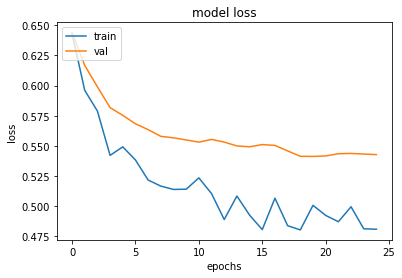

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

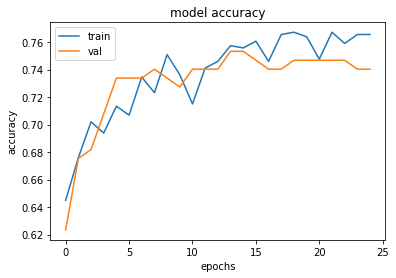

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred_keras = model_class_weights.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

5/5 [==============================] - 0s 3ms/step


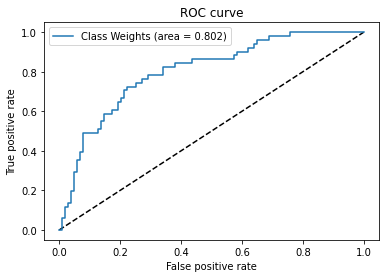

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Class Weights (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()